# Question 1

## Import Libaries

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Import dataset

In [ ]:
q_1=pd.read_csv('/content/question_1.csv')

## Solution

In [ ]:
y_coordinates = q_1.feature_1
x_coordinates = q_1.feature_2

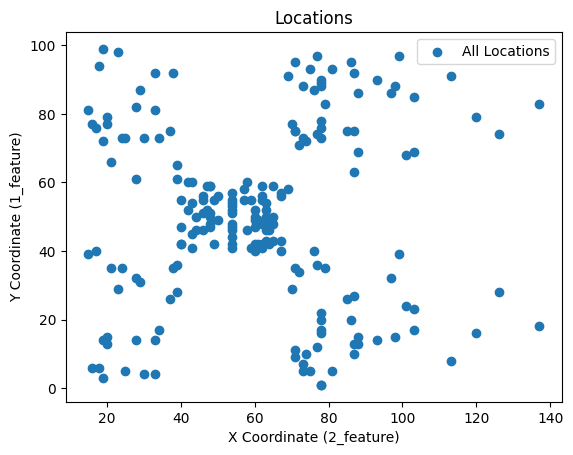

In [ ]:
# Scatter plot
plt.scatter(x_coordinates, y_coordinates, label='All Locations')
plt.xlabel('X Coordinate (2_feature)')
plt.ylabel('Y Coordinate (1_feature)')
plt.title('Locations')
plt.legend()
plt.show()


### The solution with k-nearest neighbors (KNN) algorithm

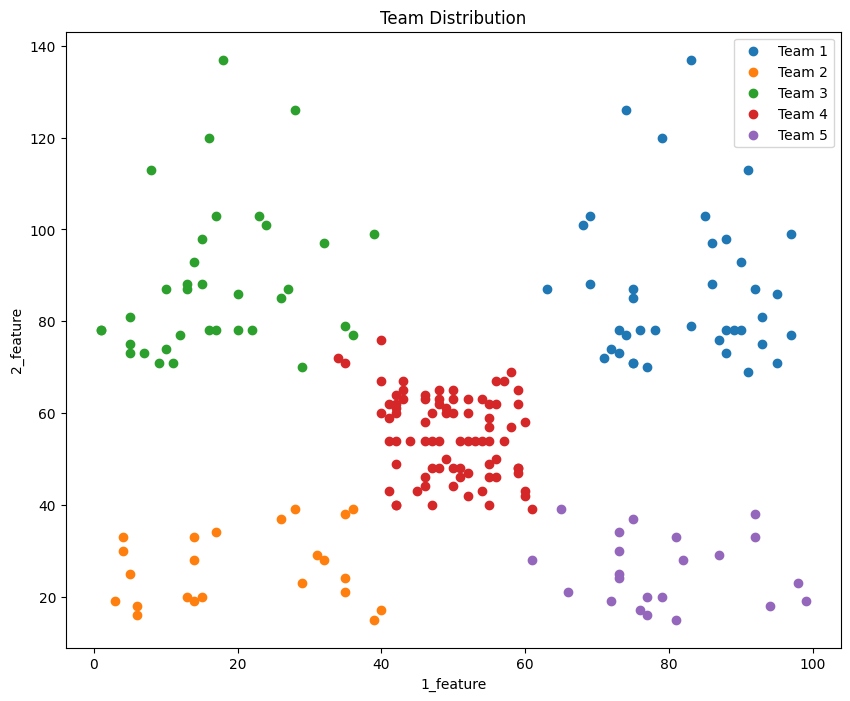

In [ ]:
# Sample data creation for demonstration
# Remove this if you have your own data to load
data = {
    '1_feature': y_coordinates,
    '2_feature': x_coordinates
}
df = pd.DataFrame(data)

# Load your actual data
# df = pd.read_csv('your_data.csv')  # Uncomment and modify this line to load your data

def initialize_centroids(df, k):
    centroids = df.sample(n=k).to_numpy()
    return centroids

def assign_clusters(df, centroids):
    distances = np.linalg.norm(df.to_numpy()[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(df, labels, k):
    new_centroids = np.array([df.to_numpy()[labels == i].mean(axis=0) for i in range(k)])
    return new_centroids

def knn_clustering(df, k, max_iters=100):
    centroids = initialize_centroids(df, k)
    for _ in range(max_iters):
        labels = assign_clusters(df, centroids)
        new_centroids = update_centroids(df, labels, k)
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return labels

# Number of clusters (teams)
k = 5
df['Number_team'] = knn_clustering(df[['1_feature', '2_feature']], k) + 1  # Adding 1 to make teams 1-indexed instead of 0-indexed

# Plotting the points with their team assignments
plt.figure(figsize=(10, 8))
for team in range(1, k + 1):
    team_data = df[df['Number_team'] == team]
    plt.scatter(team_data['1_feature'], team_data['2_feature'], label=f'Team {team}')

plt.xlabel('1_feature')
plt.ylabel('2_feature')
plt.title('Team Distribution')
plt.legend()
plt.show()

# Save the dataframe with team assignments to a new CSV file
df.to_csv('team_assigned_data.csv', index=False)


### The solution with sklearn KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


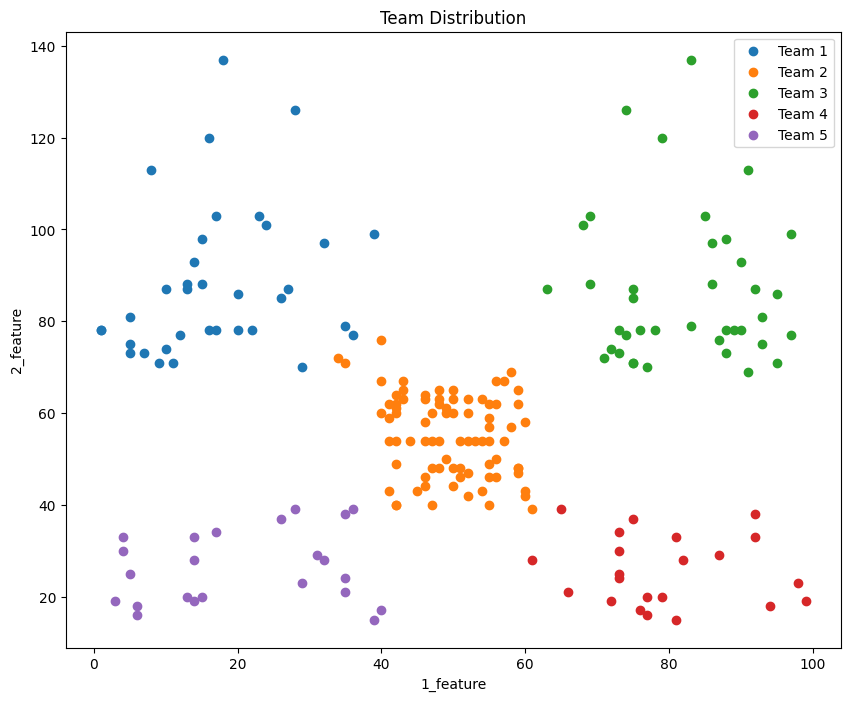

In [ ]:
# Sample data creation for demonstration
# Remove this if you have your own data to load
data = {
    '1_feature': y_coordinates,
    '2_feature': x_coordinates
}
df = pd.DataFrame(data)

# Load your actual data
# df = pd.read_csv('your_data.csv')  # Uncomment and modify this line to load your data

# Apply KMeans to divide the points into 5 clusters (teams)
kmeans = KMeans(n_clusters=5, random_state=0).fit(df[['1_feature', '2_feature']])
df['Number_team'] = kmeans.labels_ + 1  # Adding 1 to make teams 1-indexed instead of 0-indexed

# Plotting the points with their team assignments
plt.figure(figsize=(10, 8))
for team in range(1, 6):
    team_data = df[df['Number_team'] == team]
    plt.scatter(team_data['1_feature'], team_data['2_feature'], label=f'Team {team}')

plt.xlabel('1_feature')
plt.ylabel('2_feature')
plt.title('Team Distribution')
plt.legend()
plt.show()

# Save the dataframe with team assignments to a new CSV file
df.to_csv('team_assigned_data.csv', index=False)

# Question 2

## Import Libaries

In [18]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Preparing metadata (setup.py) ... done


In [19]:
import pandas as pd
import numpy as np
import pandas_profiling
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

## Import dataset

In [20]:
df=pd.read_csv('/content/question_2.csv')

## Solution

In [21]:
profile = ProfileReport(df, title="data set", html={'style' : {'full_width':True}})
profile.to_file(output_file="Overview_of_dataset.html")

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [22]:
profile

In [23]:
df.describe()

X1           X2           X3           X4           X5  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      3.900220     4.461672    12.548000     3.641536     4.100318   
std       1.224999     1.538121     2.049853     1.055685     1.146595   
min      -0.436000     0.585000     6.000000    -0.433000    -1.306000   
25%       2.867000     3.441750    11.000000     2.907750     3.393000   
50%       3.666000     4.337500    13.000000     3.832500     3.791500   
75%       4.936250     5.366000    14.000000     4.398500     4.950250   
max       7.356000    11.225000    19.000000     5.965000     7.638000   

                X6            y  
count  1000.000000  1000.000000  
mean      3.315121     0.201000  
std       1.552245     0.400949  
min      -2.252000     0.000000  
25%       2.269500     0.000000  
50%       3.210000     0.000000  
75%       4.359250     0.000000  
max       9.796000     1.000000

In [24]:
df.keys()

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'y'], dtype='object')

Accuracies of the classifiers:
Decision Tree: 0.9400
Random Forest: 0.9600
Logistic Regression: 0.8300
SVC: 0.8750
KNN: 0.9150

Best classifier is: Random Forest with accuracy of 0.9600

The top 6 features for predicting the target y are:
1. X4 with importance score 0.24704827702708296
2. X2 with importance score 0.24341428509726884
3. X5 with importance score 0.21275237611202358
4. X6 with importance score 0.15847297730558146
5. X1 with importance score 0.12478589348827071
6. X3 with importance score 0.013526190969772358


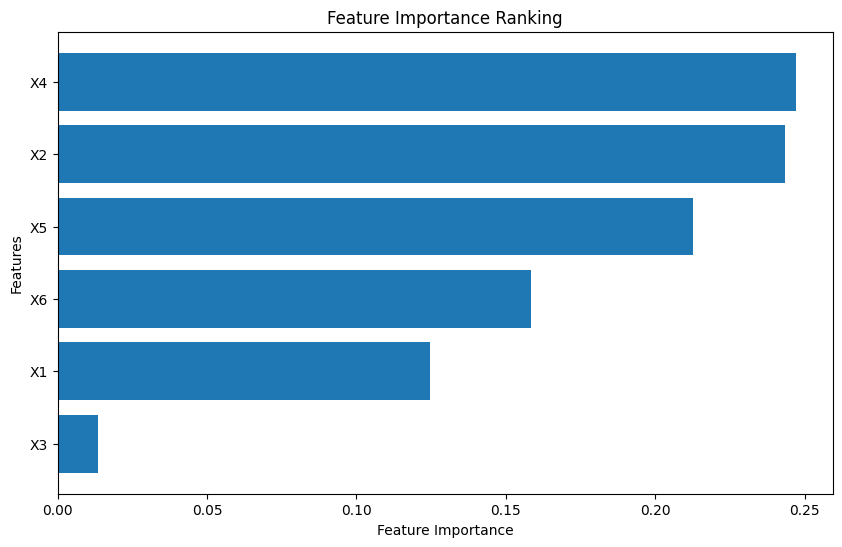

In [25]:
# Separate features and target variable
X = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6']]
y = df['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVC": SVC(),
    "KNN": KNeighborsClassifier()
}

# Train and evaluate each classifier
best_classifier = None
best_accuracy = 0
accuracies = {}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_classifier = name

print("Accuracies of the classifiers:")
for name, accuracy in accuracies.items():
    print(f"{name}: {accuracy:.4f}")

print(f"\nBest classifier is: {best_classifier} with accuracy of {best_accuracy:.4f}")

# Now use the best classifier to get feature importances
if best_classifier == "Decision Tree":
    feature_importances = classifiers[best_classifier].feature_importances_
elif best_classifier == "Random Forest":
    feature_importances = classifiers[best_classifier].feature_importances_
else:
    print(f"Feature importance is not directly available for {best_classifier}.")
    feature_importances = None

if feature_importances is not None:
    sorted_indices = np.argsort(feature_importances)[::-1]
    top_6_indices = sorted_indices[:6]
    top_6_features = X.columns[top_6_indices]

    print("\nThe top 6 features for predicting the target y are:")
    for i, idx in enumerate(top_6_indices):
        print(f"{i+1}. {X.columns[idx]} with importance score {feature_importances[idx]}")

    # Plot feature importances
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    plt.barh(X.columns[sorted_indices], feature_importances[sorted_indices], align='center')
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title('Feature Importance Ranking')
    plt.gca().invert_yaxis()
    plt.show()
